In [79]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [67]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=10240, m=50000).graph",2expnode(readPartition),0.015625,4.000000,46.406250,46.406250
1,python,"2expnode(n=1280, m=50000).graph",2expnode(readPartition),0.015625,0.281250,2.062500,2.062500
2,python,"2expnode(n=20480, m=50000).graph",2expnode(readPartition),0.312500,19.328125,130.562500,130.562500
3,python,"2expnode(n=2560, m=50000).graph",2expnode(readPartition),0.062500,4.718750,12.281250,12.281250
4,C++,"2expnode(n=20480, m=50000).graph",2expnode,0.550621,8.593238,1262.228143,1262.232822
5,C++,"2expnode(n=2560, m=50000).graph",2expnode,0.183701,2.539356,80.751151,80.751602
6,python,"2expnode(n=40960, m=50000).graph",2expnode(readPartition),0.328125,81.531250,434.953125,434.984375
7,python,"2expnode(n=5120, m=50000).graph",2expnode(readPartition),0.078125,2.656250,17.906250,17.906250
8,python,"2expnode(n=640, m=50000).graph",2expnode(readPartition),0.031250,0.234375,1.390625,1.390625
9,C++,"2expnode(n=40960, m=50000).graph",2expnode,2.433100,44.013690,2950.640926,2950.649790


In [68]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [69]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

# Double Experiment (node with read partition)

##### Filter results

In [70]:
dexpnode_readp = all_data[ all_data["Flag"] == "2expnode(readPartition)"]
dexpnode_readp = dexpnode_readp[dexpnode_readp["Code"] == "python"]

##### Set number of nodes as ID

In [71]:
dexpnode_readp.set_index("n", inplace=True)
dexpnode_readp.sort_index(inplace=True)

##### Set number of community 

In [72]:
def numberOfCommunity(graph_name):
    partition_name = graph_name[:-len(".graph")]
    partition_path = f"../partial_results/partitions/{partition_name}"
    print(partition_path)
    partition_reader = BinaryPartitionReader()
    partition = partition_reader.read(partition_path)
    return partition.numberOfSubsets()

In [73]:
dexpnode_readp["#Community"] = dexpnode_readp["Graph"].apply(numberOfCommunity)
dexpnode_readp

../partial_results/partitions/2expnode(n=640, m=50000)
../partial_results/partitions/2expnode(n=1280, m=50000)
../partial_results/partitions/2expnode(n=2560, m=50000)
../partial_results/partitions/2expnode(n=5120, m=50000)
../partial_results/partitions/2expnode(n=10240, m=50000)
../partial_results/partitions/2expnode(n=20480, m=50000)
../partial_results/partitions/2expnode(n=40960, m=50000)


,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total,m,deltaNodesComputation,deltaGLR,#Community
n,,,,,,,,,,,
640,python,"2expnode(n=640, m=50000).graph",2expnode(readPartition),0.031250,0.234375,1.390625,1.390625,50000,0.203125,1.156250,8
1280,python,"2expnode(n=1280, m=50000).graph",2expnode(readPartition),0.015625,0.281250,2.062500,2.062500,50000,0.265625,1.781250,8
2560,python,"2expnode(n=2560, m=50000).graph",2expnode(readPartition),0.062500,4.718750,12.281250,12.281250,50000,4.656250,7.562500,3
5120,python,"2expnode(n=5120, m=50000).graph",2expnode(readPartition),0.078125,2.656250,17.906250,17.906250,50000,2.578125,15.250000,12
10240,python,"2expnode(n=10240, m=50000).graph",2expnode(readPartition),0.015625,4.000000,46.406250,46.406250,50000,3.984375,42.406250,22
20480,python,"2expnode(n=20480, m=50000).graph",2expnode(readPartition),0.312500,19.328125,130.562500,130.562500,50000,19.015625,111.234375,22
40960,python,"2expnode(n=40960, m=50000).graph",2expnode(readPartition),0.328125,81.531250,434.953125,434.984375,50000,81.203125,353.421875,113


##### compute Total/#Community

In [74]:
dexpnode_readp["Total/#Community"] = dexpnode_readp["Total"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "Total", "Total/#Community"]]

,#Community,Total,Total/#Community
n,,,
640,8,1.390625,0.173828
1280,8,2.062500,0.257812
2560,3,12.281250,4.093750
5120,12,17.906250,1.492188
10240,22,46.406250,2.109375
20480,22,130.562500,5.934659
40960,113,434.984375,3.849419


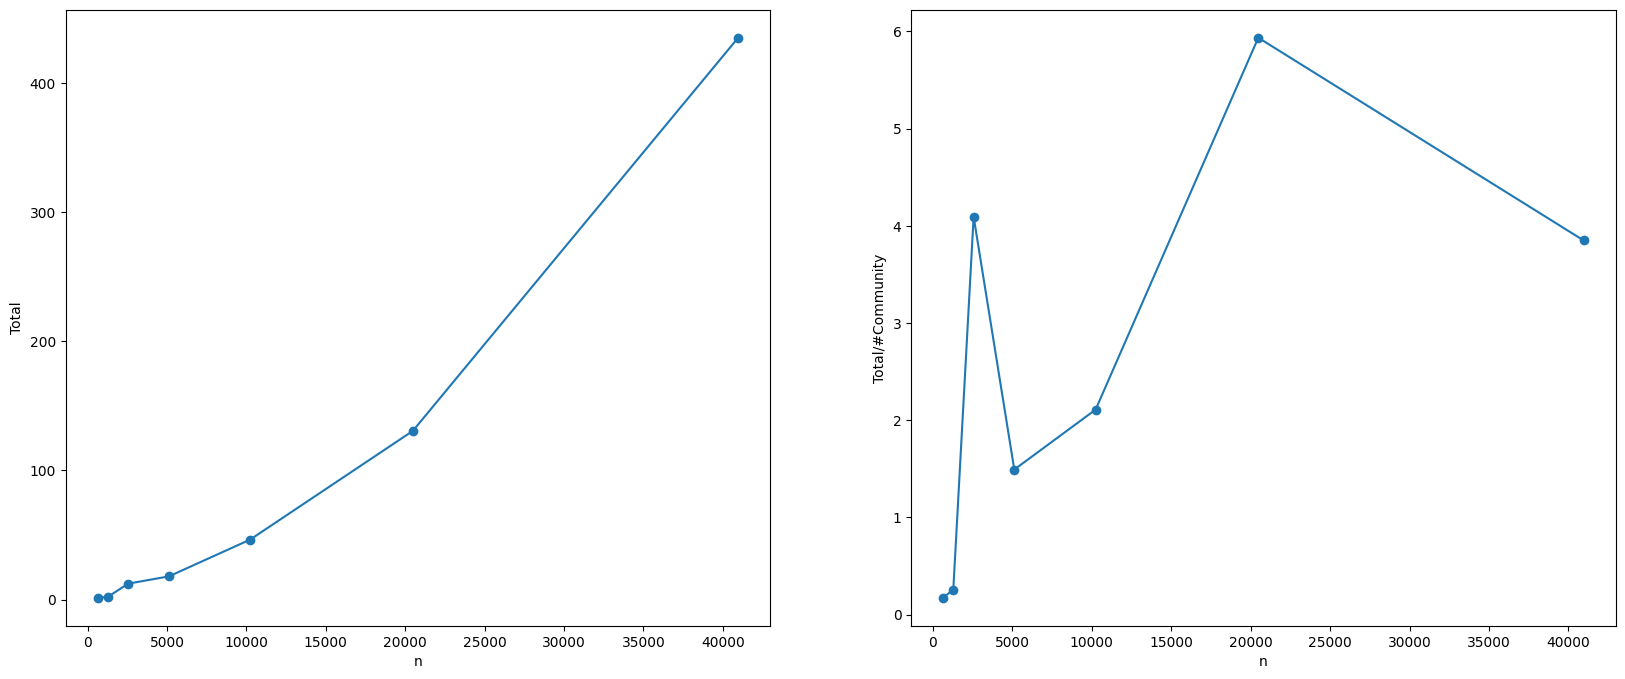

In [89]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("Total")
ax2.set_ylabel("Total/#Community")
dexpnode_readp["Total"].plot(marker="o", ax=ax1)
dexpnode_readp["Total/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute nodesComputation/#Community

In [90]:
dexpnode_readp["deltaNodesComputation/#Community"] = dexpnode_readp["deltaNodesComputation"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaNodesComputation", "deltaNodesComputation/#Community"]]

,#Community,deltaNodesComputation,deltaNodesComputation/#Community
n,,,
640,8,0.203125,0.025391
1280,8,0.265625,0.033203
2560,3,4.656250,1.552083
5120,12,2.578125,0.214844
10240,22,3.984375,0.181108
20480,22,19.015625,0.864347
40960,113,81.203125,0.718612


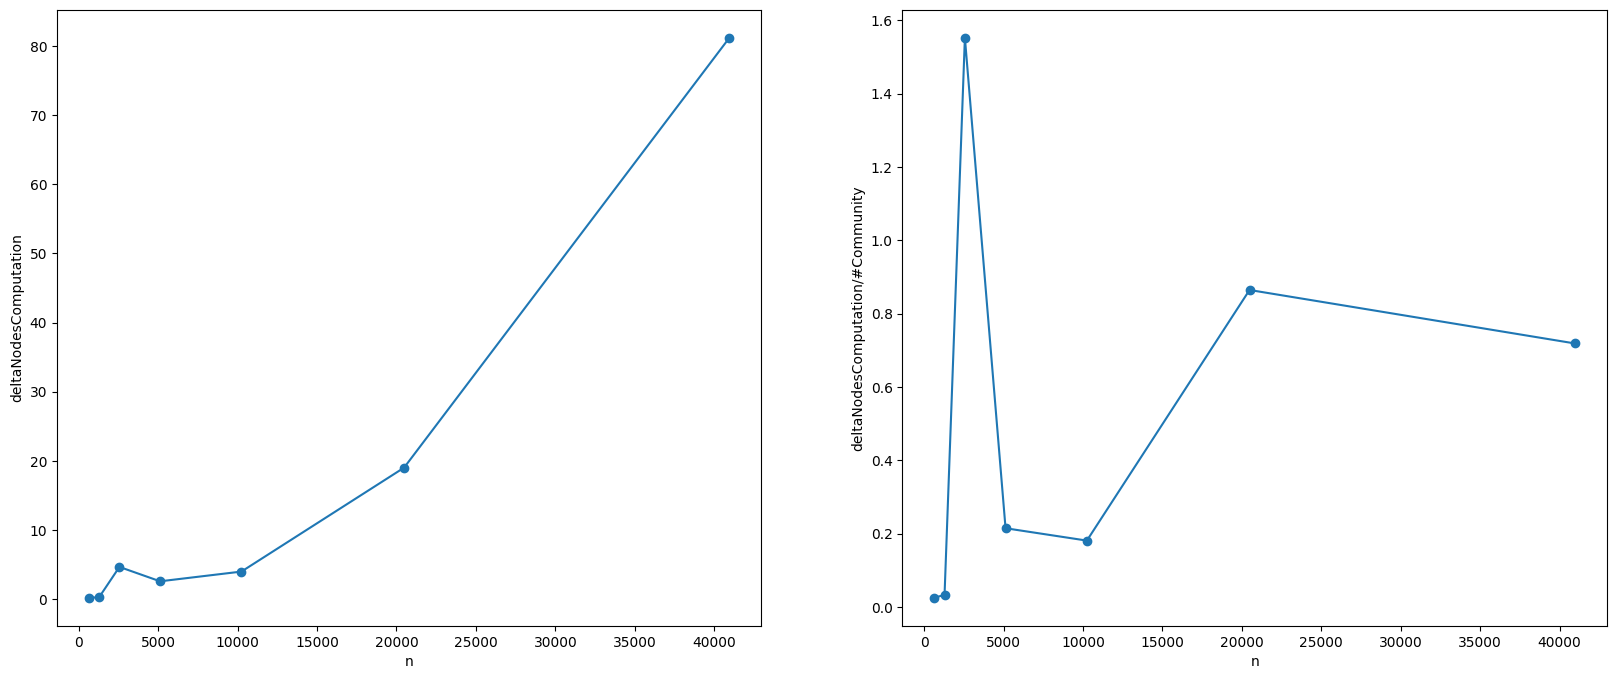

In [91]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaNodesComputation")
ax2.set_ylabel("deltaNodesComputation/#Community")
dexpnode_readp["deltaNodesComputation"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaNodesComputation/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute deltaGLR/#Community

In [93]:
dexpnode_readp["deltaGLR/#Community"] = dexpnode_readp["deltaGLR"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaGLR", "deltaGLR/#Community"]]

,#Community,deltaGLR,deltaGLR/#Community
n,,,
640,8,1.156250,0.144531
1280,8,1.781250,0.222656
2560,3,7.562500,2.520833
5120,12,15.250000,1.270833
10240,22,42.406250,1.927557
20480,22,111.234375,5.056108
40960,113,353.421875,3.127627


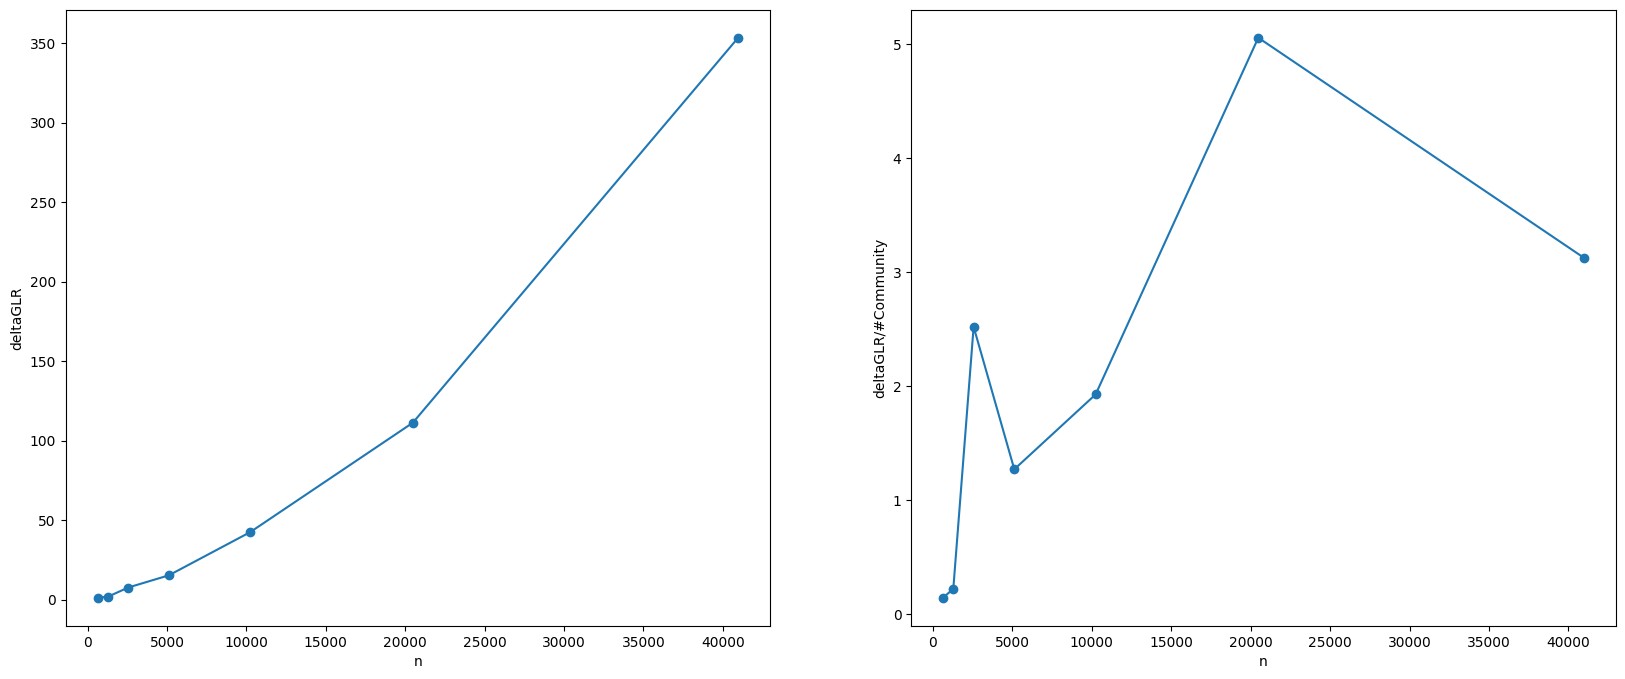

In [94]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaGLR")
ax2.set_ylabel("deltaGLR/#Community")
dexpnode_readp["deltaGLR"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaGLR/#Community"].plot(marker="o", ax=ax2)
plt.show()